## seasonal patterns FLC events in georges bank

In [1]:
import glob
import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nlct_path = "/mnt/data2/jturner/nlct_data/georges_bank/"

In [3]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 47

Creating seasonal average for month: 

In [4]:
month = '04' #mm
month_name = 'April'

In [5]:
files = sorted(glob.glob(nlct_path+'202?'+month+'*/*00H_00M'))

In [6]:
for file in files: 
    print(file.split('/')[-2])

20220401
20220402
20220403
20220404
20220405
20220406
20220407
20220408
20220409
20220410
20220411
20220412
20220413
20220414
20220415
20220416
20220417
20220418
20220419
20220420
20220421
20220422
20220423
20220424
20220425
20220426
20220427
20220428
20220429
20220430
20230401
20230402
20230403
20230404
20230405
20230406
20230407
20230408
20230409
20230410
20230411
20230412
20230413
20230414
20230415
20230416
20230417
20230418
20230419
20230420
20230421
20230422
20230423
20230424
20230425
20230426
20230427
20230428
20230429
20230430


Each NLCT file is a saved xarray DataArray, they need the dictionary to be appended into a Dataset:

In [7]:
datasets = []

for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        my_dict = {'BTD': data} 
        ds = xr.Dataset(my_dict)
        
        #--- Set negative values to zero
        ds['BTD'] = xr.where(ds['BTD'] < 0, 0, ds['BTD'])

        #--- Set positive values to 1
        #ds['BTD'] = xr.where(ds['BTD'] > 0, 1, ds['BTD'])
        
        datasets.append(ds)

nlst_ds = xr.concat(datasets, dim='time')

In [8]:
btd_mean = nlst_ds['BTD'].sum(dim='time')

In [9]:
overall_mean = btd_mean.mean(dim='y')
overall_mean = overall_mean.mean(dim='x')

In [10]:
high_lim = overall_mean.values
low_lim = overall_mean.values

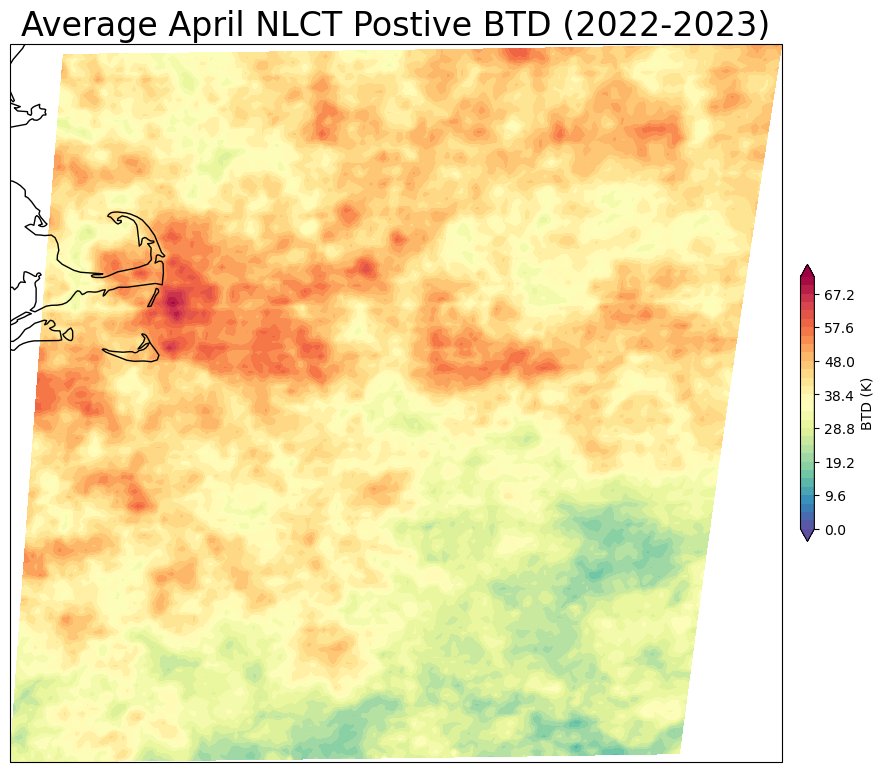

In [11]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(0, 72, 31)

c=ax.contourf(btd_mean.lon, btd_mean.lat, btd_mean, cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Average '+month_name+' NLCT Postive BTD (2022-2023)', fontsize=24)
clb.set_label('BTD (K)')

ax.add_feature(cfeature.STATES)

plt.savefig('NLCT_Seasonal/'+month_name+'_nclt.png', bbox_inches='tight')